Assignment 3 (due on 11/22)

Student：余哲（12332280），Gtihub：atheistmao

批改人：赵淑慧

得分：55/60

# PS1. Niño 3.4 index
20/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。10/10

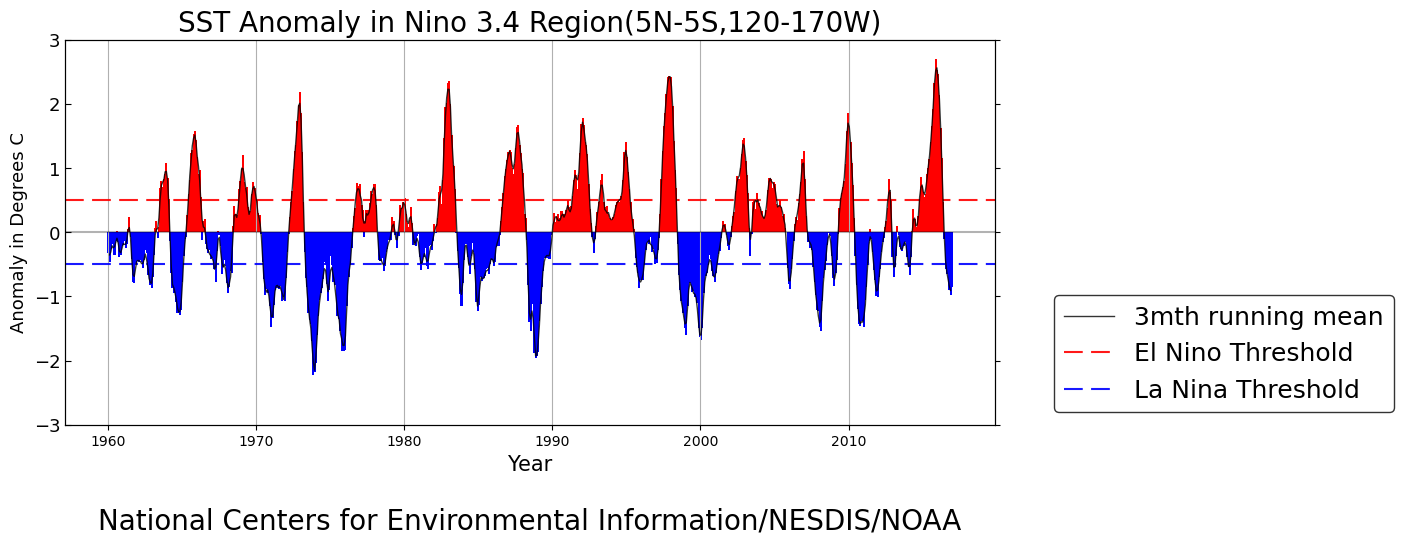

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Load dataset
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

# Calculate anomalies and rolling mean
group_data = ds.sst.groupby('time.month')
sst_anom = group_data - group_data.mean(dim='time')
ano = sst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim=['lat', 'lon'])
ds_anom_rolling = sst_anom.rolling(time=3, center=True).mean()
g = ds_anom_rolling.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim=['lat', 'lon'])

# Convert to DataFrames
y = ano.to_dataframe()
y1 = g.to_dataframe()

# Create subplots
fig, ax = plt.subplots(figsize=(12, 5))

# Bar chart
colors = ['r' if value >= 0 else 'blue' for value in y['sst']]
ax.bar(y.index, y['sst'], width=50, color=colors)
ax.grid(axis='x')
ax.tick_params(axis='y', labelsize=13, direction='in', length=4)
ax.tick_params(axis="y", direction="in", which="minor", length=2)
ax.set_ylim(-3, 3)
ax.set_yticks(np.arange(-3, 3.2, 1))
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Anomaly in Degrees C', fontsize=13)
ax.set_title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)', fontsize=20)
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axhline(y=0.5, color='r', linestyle=(0, (9, 4)), alpha=0.9, label='El Nino Threshold')
ax.axhline(y=-0.5, color='b', linestyle=(0, (9, 4)), alpha=0.9, label='La Nina Threshold')

# Second y-axis for the line plot
ax2 = ax.twinx()
ax2.plot(y1.index, y1['sst'], color='k', alpha=0.8, linewidth=1, label='3mth running mean')
ax2.set_ylim(ax.get_ylim())

# Combine legends for both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines2 + lines, labels2 + labels, loc='lower left', bbox_to_anchor=(1.05, 0),fontsize=18,edgecolor='black')

# Hide right y-axis tick labels
ax2.set_yticklabels([])

# Add a text annotation below the x-axis
ax.text(0.5, -0.25, 'National Centers for Environmental Information/NESDIS/NOAA', fontsize=20, ha='center', va='center', transform=ax.transAxes)

# Show the plot
plt.show()

# PS2. Earth’s energy budget
25/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——可以加上两种TOA净通量相等的文字性解释。5/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。10/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——要求计算辐射总量，需乘上面积，再按时间平均，结果单位为W。3/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——云覆盖情况与辐射量是一一对应的，故应先筛选低云或高云区再按时间平均，见参考代码。4/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——2.4的计算思路错误导致2.5的结论有误，见参考代码。3/5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Load dataset
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

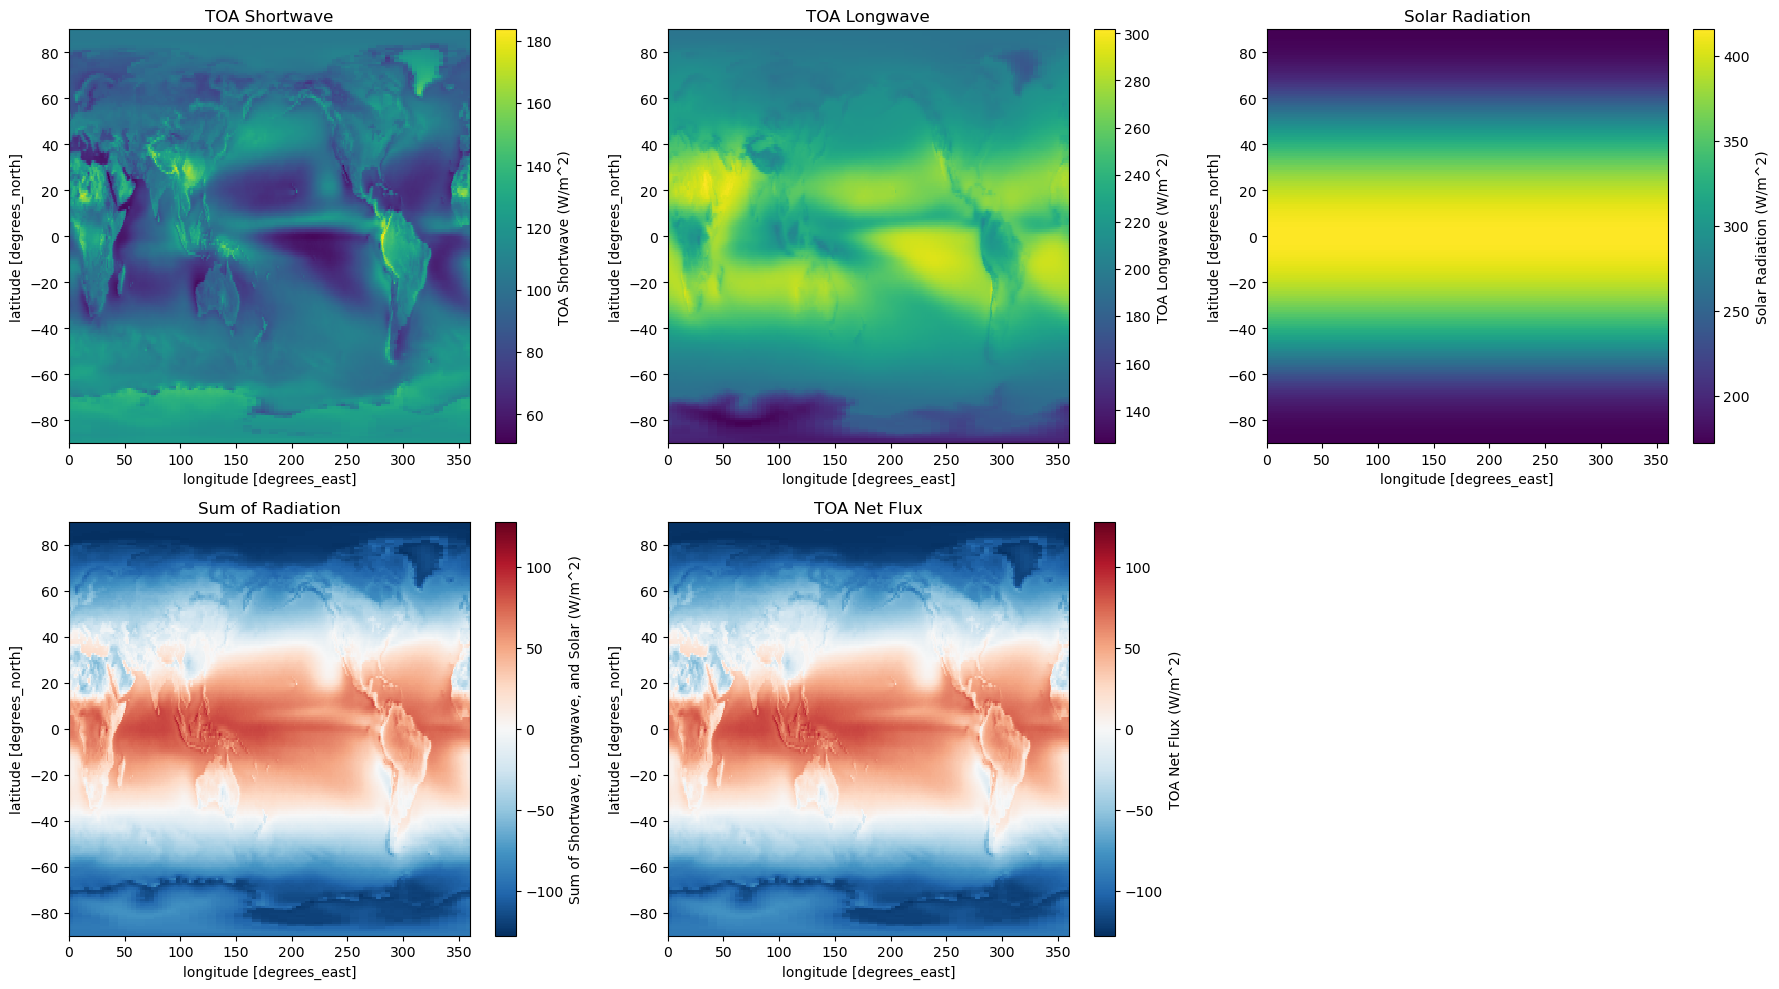

In [4]:
#Q2.1
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc")

# Extract relevant variables
toa_sw_all = ds['toa_sw_all_mon']
toa_lw_all = ds['toa_lw_all_mon']
solar_mon = ds['solar_mon']
toa_net_all = ds['toa_net_all_mon']

# Calculate time mean for each variable
toa_sw_mean = toa_sw_all.mean(dim='time')
toa_lw_mean = toa_lw_all.mean(dim='time')
solar_mean = solar_mon.mean(dim='time')
toa_net_mean = toa_net_all.mean(dim='time')

# Calculate the sum of shortwave, longwave, and solar to verify TOA net flux
sum_radiation =  solar_mean - toa_sw_mean - toa_lw_mean

# Create separate 2D plots for each variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# TOA Shortwave
toa_sw_mean.plot(ax=axes[0, 0], cbar_kwargs={'label': 'TOA Shortwave (W/m^2)'})
axes[0, 0].set_title('TOA Shortwave')

# TOA Longwave
toa_lw_mean.plot(ax=axes[0, 1], cbar_kwargs={'label': 'TOA Longwave (W/m^2)'})
axes[0, 1].set_title('TOA Longwave')

# Solar Radiation
solar_mean.plot(ax=axes[0, 2],cbar_kwargs={'label': 'Solar Radiation (W/m^2)'})
axes[0, 2].set_title('Solar Radiation')

# Sum of Shortwave, Longwave, and Solar Radiation
sum_radiation.plot(ax=axes[1, 0],cbar_kwargs={'label': 'Sum of Shortwave, Longwave, and Solar (W/m^2)'})
axes[1, 0].set_title('Sum of Radiation')

# TOA Net Flux
toa_net_mean.plot(ax=axes[1, 1],  cbar_kwargs={'label': 'TOA Net Flux (W/m^2)'})
axes[1, 1].set_title('TOA Net Flux')

# Blank subplot for better layout
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [5]:
#Q2.2
lat = np.radians(toa_sw_all['lat'])
lon = np.radians(toa_sw_all['lon'])

# Calculate area weights
cos_lat = np.cos(lat)
area_weights = cos_lat / cos_lat.mean()

# Calculate area-weighted average for each variable
toa_sw_avg = (toa_sw_all * area_weights).mean(dim=['lon', 'lat'])
toa_lw_avg = (toa_lw_all * area_weights).mean(dim=['lon', 'lat'])
solar_avg = (solar_mon * area_weights).mean(dim=['lon', 'lat'])

# Print the calculated values
print(f"TOA Incoming Solar Flux: {solar_avg.mean().values} W/m^2")
print(f"TOA Outgoing Longwave Flux: {toa_lw_avg.mean().values} W/m^2")
print(f"TOA Outgoing Shortwave Flux: {toa_sw_avg.mean().values} W/m^2")

TOA Incoming Solar Flux: 340.2851257324219 W/m^2
TOA Outgoing Longwave Flux: 240.2679901123047 W/m^2
TOA Outgoing Shortwave Flux: 99.13904571533203 W/m^2


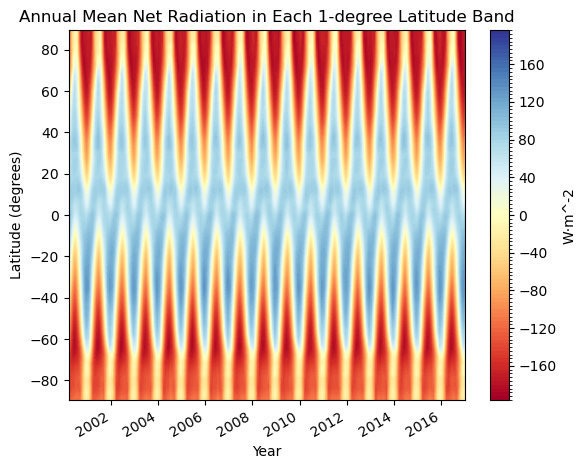

In [6]:
# Calculate area-weighted net radiation for each latitude band
net_radiation_by_lat = ds.toa_net_all_mon.mean(dim='lon').plot.contourf(x='time', levels=100, cmap='RdYlBu')
net_radiation_by_lat.colorbar.set_label('W·m^-2')

# Plot the total amount of net radiation in each 1-degree latitude band
plt.xlabel('Year')
plt.ylabel('Latitude (degrees)')
plt.title('Annual Mean Net Radiation in Each 1-degree Latitude Band')


plt.show()


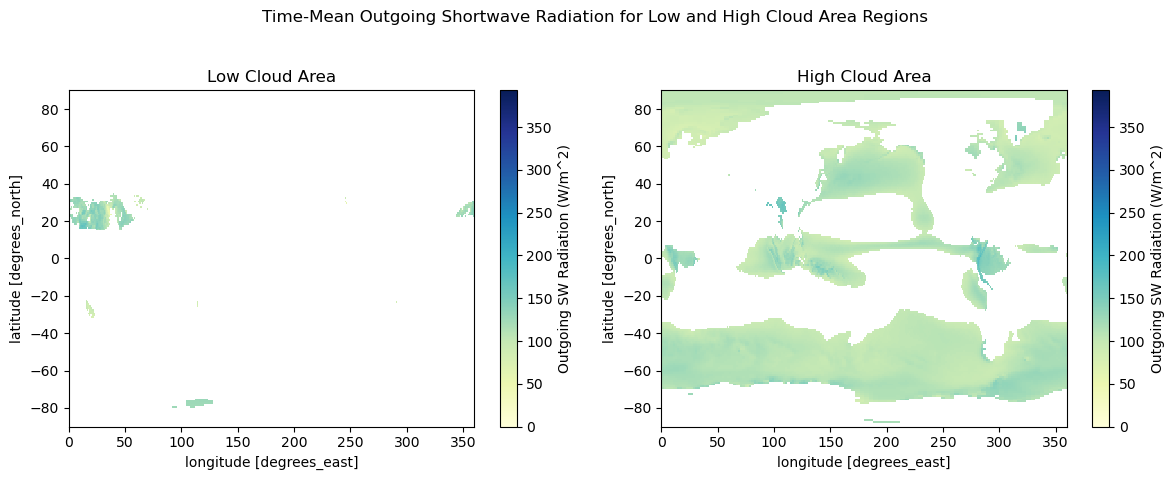

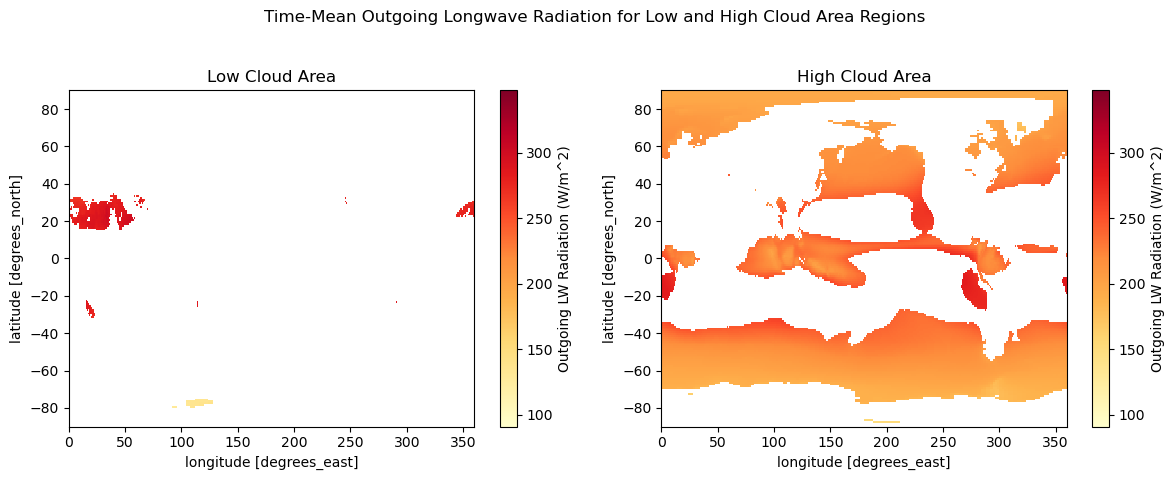

In [7]:
#Q2.4
# Extract relevant variables
cloud_area = ds['cldarea_total_daynight_mon']

# Define low and high cloud area regions
low_cloud_area = cloud_area.mean(dim='time') <= 25
high_cloud_area = cloud_area.mean(dim='time') >= 75

# Calculate time-mean outgoing shortwave and longwave radiation for low and high cloud areas
toa_sw_low_cloud = toa_sw_all.where(low_cloud_area).mean(dim='time')
toa_lw_low_cloud = toa_lw_all.where(low_cloud_area).mean(dim='time')

toa_sw_high_cloud = toa_sw_all.where(high_cloud_area).mean(dim='time')
toa_lw_high_cloud = toa_lw_all.where(high_cloud_area).mean(dim='time')

# Plot the composites of time-mean outgoing shortwave radiation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
toa_sw_low_cloud.plot(cmap='YlGnBu', vmin=toa_sw_all.min(), vmax=toa_sw_all.max(),cbar_kwargs={'label': 'Outgoing SW Radiation (W/m^2)'})
plt.title('Low Cloud Area')

plt.subplot(1, 2, 2)
toa_sw_high_cloud.plot(cmap='YlGnBu', vmin=toa_sw_all.min(), vmax=toa_sw_all.max(),cbar_kwargs={'label': 'Outgoing SW Radiation (W/m^2)'})
plt.title('High Cloud Area')

plt.suptitle('Time-Mean Outgoing Shortwave Radiation for Low and High Cloud Area Regions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the composites of time-mean outgoing longwave radiation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
toa_lw_low_cloud.plot(cmap='YlOrRd', vmin=toa_lw_all.min(), vmax=toa_lw_all.max(),cbar_kwargs={'label': 'Outgoing LW Radiation (W/m^2)'})
plt.title('Low Cloud Area')

plt.subplot(1, 2, 2)
toa_lw_high_cloud.plot(cmap='YlOrRd', vmin=toa_lw_all.min(), vmax=toa_lw_all.max(),cbar_kwargs={'label': 'Outgoing LW Radiation (W/m^2)'})
plt.title('High Cloud Area')

plt.suptitle('Time-Mean Outgoing Longwave Radiation for Low and High Cloud Area Regions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

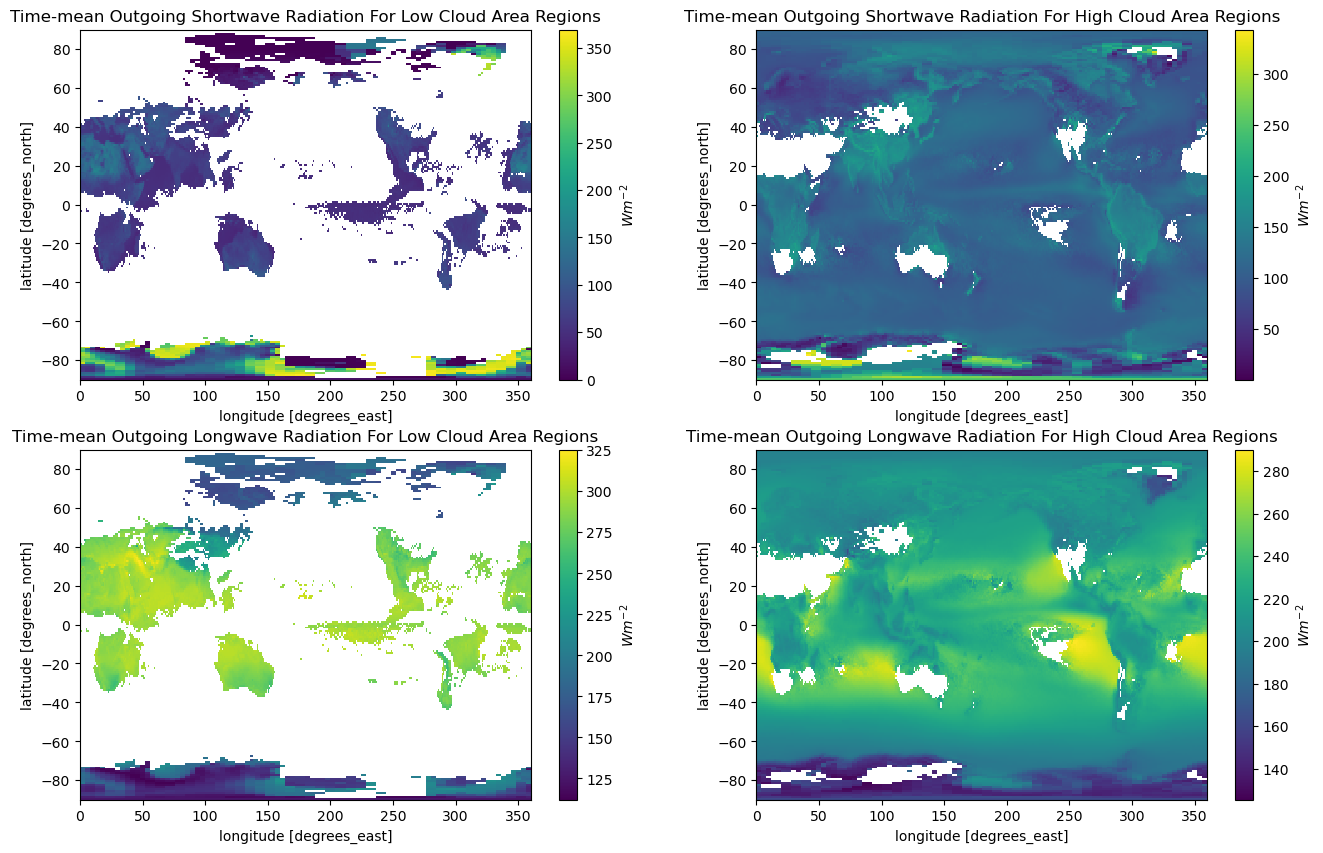

In [9]:
# 参考代码
lc_shortwave=ds.toa_sw_all_mon.where(ds.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_shortwave=ds.toa_sw_all_mon.where(ds.cldarea_total_daynight_mon>=75).mean(dim='time')

lc_longwave=ds.toa_lw_all_mon.where(ds.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_longwave=ds.toa_lw_all_mon.where(ds.cldarea_total_daynight_mon>=75).mean(dim='time')
# lc_longwave,hc_longwave

fig,axs =plt.subplots(2,2,figsize=(16,10))
axs=axs.flatten()

fig1=lc_shortwave.plot(ax=axs[0],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[0].set_title('Time-mean Outgoing Shortwave Radiation For Low Cloud Area Regions')

fig2=hc_shortwave.plot(ax=axs[1],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[1].set_title('Time-mean Outgoing Shortwave Radiation For High Cloud Area Regions')

fig3=lc_longwave.plot(ax=axs[2],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[2].set_title('Time-mean Outgoing Longwave Radiation For Low Cloud Area Regions')

fig4=hc_longwave.plot(ax=axs[3],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[3].set_title('Time-mean Outgoing Longwave Radiation For High Cloud Area Regions')

plt.show()

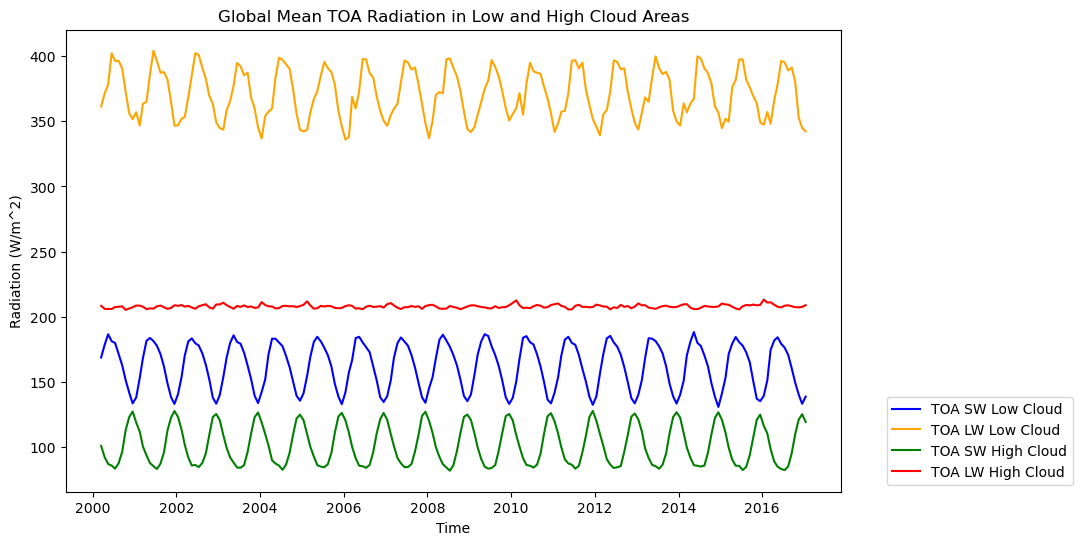

In [8]:
#Q2.5
# Extract relevant variables and coordinates
toa_sw_all = ds['toa_sw_all_mon']
toa_lw_all = ds['toa_lw_all_mon']
lat = np.radians(toa_sw_all['lat'])
lon = np.radians(toa_sw_all['lon'])

# Calculate area-weighted global mean values for shortwave and longwave radiation in low and high cloud areas
global_sw_low_cloud = (toa_sw_all *  area_weights).where(low_cloud_area).mean(dim=['lat', 'lon'])
global_lw_low_cloud = (toa_lw_all *  area_weights).where(low_cloud_area).mean(dim=['lat', 'lon'])

global_sw_high_cloud = (toa_sw_all * area_weights).where(high_cloud_area).mean(dim=['lat', 'lon'])
global_lw_high_cloud = (toa_lw_all * area_weights).where(high_cloud_area).mean(dim=['lat', 'lon'])
# Plot the four time series on a single graph
plt.figure(figsize=(10, 6))

# Plot global mean TOA shortwave radiation in low cloud areas
plt.plot(global_sw_low_cloud['time'], global_sw_low_cloud, label='TOA SW Low Cloud', color='blue')

# Plot global mean TOA longwave radiation in low cloud areas
plt.plot(global_lw_low_cloud['time'], global_lw_low_cloud, label='TOA LW Low Cloud', color='orange')

# Plot global mean TOA shortwave radiation in high cloud areas
plt.plot(global_sw_high_cloud['time'], global_sw_high_cloud, label='TOA SW High Cloud', color='green')

# Plot global mean TOA longwave radiation in high cloud areas
plt.plot(global_lw_high_cloud['time'], global_lw_high_cloud, label='TOA LW High Cloud', color='red')

# Set plot title and labels
plt.title('Global Mean TOA Radiation in Low and High Cloud Areas')
plt.xlabel('Time')
plt.ylabel('Radiation (W/m^2)')

# Add legend
plt.legend(loc='lower left',bbox_to_anchor=(1.05, 0))

# Show the plot
plt.show()

In [10]:
# 参考代码
weights1 = np.cos(np.deg2rad(lc_shortwave.lat))
lc_mean_shortwave=lc_shortwave.weighted(weights1).mean()
hc_mean_shortwave=hc_shortwave.weighted(weights1).mean()
lc_mean_longwave=lc_longwave.weighted(weights1).mean()
hc_mean_longwave=hc_longwave.weighted(weights1).mean()
print(f'The global mean values of shortwave radiation in high and low cloud regions are {hc_mean_shortwave:f} and {lc_mean_shortwave:f} Wm-2 respectively.')
print(f'The global mean values of longwave radiation in high and low cloud regions are {hc_mean_longwave:f} and {lc_mean_longwave:f} Wm-2 respectively.')
print('In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.')

The global mean values of shortwave radiation in high and low cloud regions are 113.157120 and 75.494324 Wm-2 respectively.
The global mean values of longwave radiation in high and low cloud regions are 225.708435 and 270.853027 Wm-2 respectively.
In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.


# PS3. Explore a netCDF dataset
10/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。5/5
2. 用该数据集绘制至少5种不同的图。5/5

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Load dataset
ds = xr.open_dataset('precip.mon.nobs.1x1.v7.nc', engine="netcdf4")

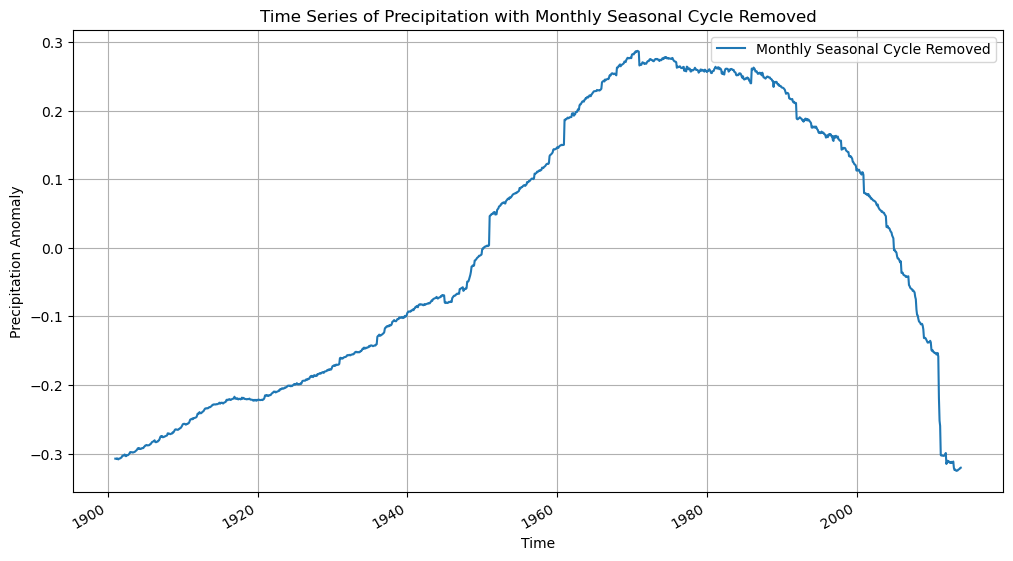

In [56]:
#Q3.1
# Extract the variable of interest (precipitation)
precip = ds['precip']

# Calculate the monthly climatology (mean) to remove the seasonal cycle
monthly_climatology = precip.groupby('time.month').mean(dim='time')

# Remove the monthly climatology from the original data
anomaly = precip.groupby('time.month') - monthly_climatology

# Plot the time series of the variable with the monthly seasonal cycle removed
plt.figure(figsize=(12, 6))
anomaly.mean(dim=['lat', 'lon']).plot(label='Monthly Seasonal Cycle Removed')

plt.xlabel('Time')
plt.ylabel('Precipitation Anomaly')
plt.title('Time Series of Precipitation with Monthly Seasonal Cycle Removed')
plt.legend()
plt.grid(True)
plt.show()

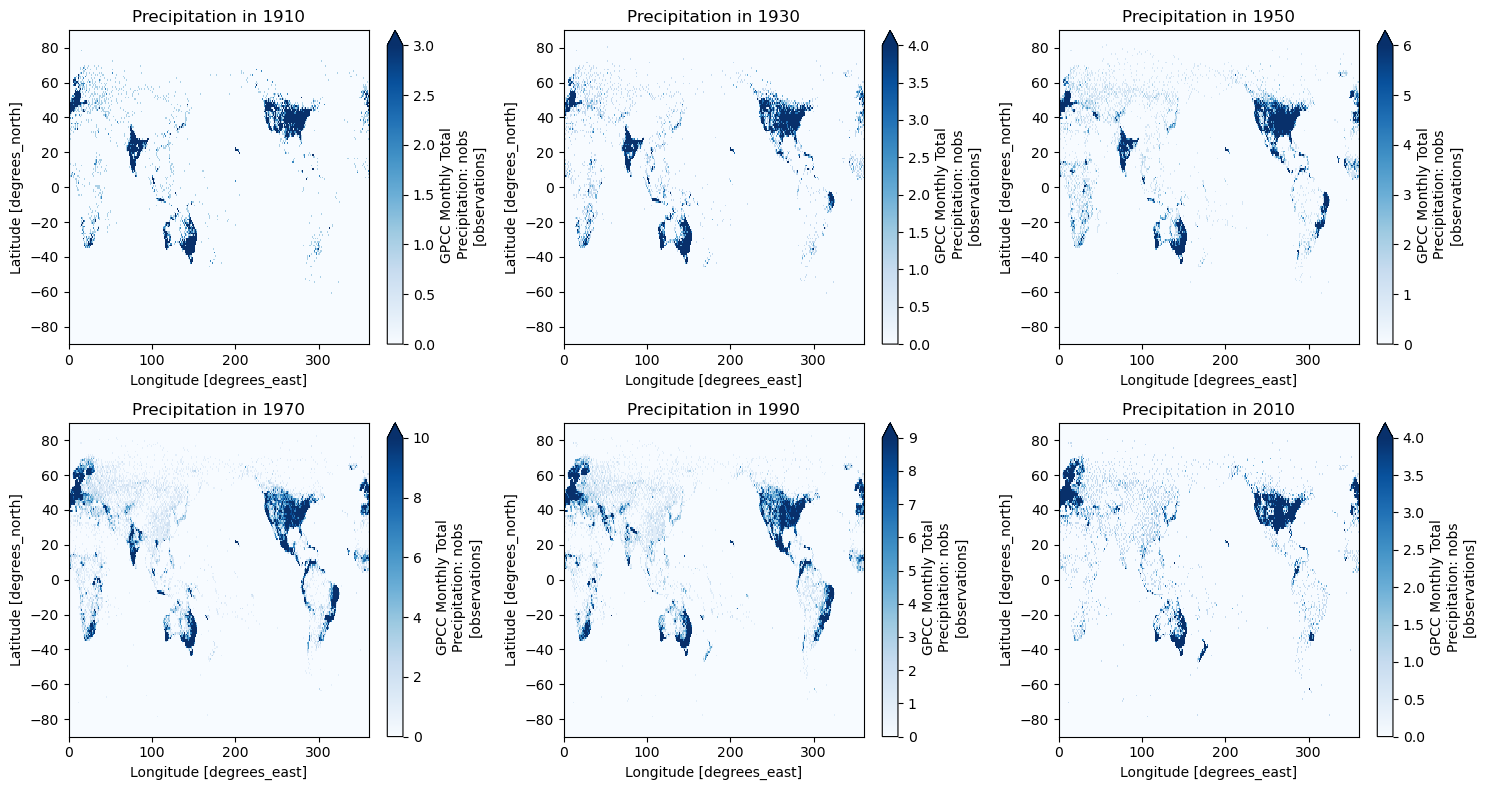

In [30]:
# Extract years 1910, 1930, 1950, 1970, 1990, 2010
years = [1910, 1930, 1950, 1970, 1990, 2010]
selected_years = precip.sel(time=precip['time.year'].isin(years))

# Plot 2D maps for each selected year in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, year in enumerate(years):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    selected_years.sel(time=f'{year}-01-01').plot(ax=ax, cmap='Blues', robust=True)
    ax.set_title(f'Precipitation in {year}')

plt.tight_layout()
plt.show()